In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('automobile.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data['height']

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
197    55.5
198    55.5
199    55.5
200    55.5
201    55.5
Name: height, Length: 202, dtype: float64

In [4]:
ds = data.copy()

In [5]:
ds.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [6]:
for i in ds.columns:
    if ((ds[i].isnull().sum() / len(ds)) * 100) < 30:
        if ds[i].dtypes != 'O':
            ds[i].fillna(ds[i].median(), inplace = True)
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True)
    else:
      ds.drop(i, axis = 1, inplace =True)

ds.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
cat = ds.select_dtypes(exclude = 'number')
num = ds.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Data')
display(cat.head())

Numerical Data


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450




Categorical Data


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500


In [8]:
#knowing the columns to scale
cols_to_scale = []
for i in num.columns:
    if ds[i].describe()[2] > 1500:
        cols_to_scale.append(i)


cols_to_scale

['price']

In [9]:
# to encode categorical datas
from sklearn.preprocessing import LabelEncoder
import joblib

encoded = {}
for i in cat.columns:
    encode = LabelEncoder()
    ds[i] = encode.fit_transform(ds[i])
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i + 'encoder'] = encode

encoded

{'makeencoder': LabelEncoder(),
 'fuel-typeencoder': LabelEncoder(),
 'aspirationencoder': LabelEncoder(),
 'num-of-doorsencoder': LabelEncoder(),
 'body-styleencoder': LabelEncoder(),
 'drive-wheelsencoder': LabelEncoder(),
 'engine-locationencoder': LabelEncoder(),
 'engine-typeencoder': LabelEncoder(),
 'num-of-cylindersencoder': LabelEncoder(),
 'fuel-systemencoder': LabelEncoder(),
 'boreencoder': LabelEncoder(),
 'strokeencoder': LabelEncoder(),
 'horsepowerencoder': LabelEncoder(),
 'peak-rpmencoder': LabelEncoder()}

In [10]:
ds.horsepower.sample(200).values

array([ 0,  5, 31,  7, 18, 51, 53, 41,  1, 27, 52, 56, 39, 11, 21, 42, 19,
       23,  0, 53, 57, 41, 42, 34, 41, 34, 49, 52, 29, 47,  9,  2, 46,  4,
        7,  7, 23,  9, 22, 39,  9, 50, 41, 51, 48, 27, 28, 41, 54, 41, 33,
       42,  7,  9,  4,  5, 19, 45, 41, 39, 39, 13, 41, 51, 57, 46, 41, 42,
       11, 41, 14,  9, 49, 51, 41, 57, 52,  8, 38, 23, 41,  4,  7, 43, 36,
       45, 48,  1, 12, 43, 56, 43, 31, 22,  1, 20, 28, 42,  1, 52,  4, 37,
       36, 16, 15, 31, 45, 44, 41, 41, 29,  2,  5,  2, 58,  4, 55,  2, 54,
       53, 24,  9,  9, 56,  4, 18, 40, 56,  1,  7, 56, 41,  3, 42, 23, 41,
       43, 39, 42, 18,  9, 48, 58,  4, 12, 24, 32, 25, 54,  2, 18, 11, 19,
       12,  6, 48, 46, 41, 42, 48, 18, 56, 43,  6, 57,  1, 28, 43, 49, 17,
       52,  4, 57, 12, 50, 54, 26, 43, 25, 42, 41, 43, 56, 35, 55,  9,  7,
       43, 23, 52, 10, 30,  5, 21, 50, 46, 41, 42, 49, 46])

In [11]:
ds.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,13495
1,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,16500
2,1,115.0,0,1,0,1,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,17450
5,2,115.0,1,1,0,1,3,1,0,99.8,...,136,5,13,24,8.5,4,16,19,25,15250
6,1,158.0,1,1,0,0,3,1,0,105.8,...,136,5,13,24,8.5,4,16,19,25,17710
7,1,115.0,1,1,0,0,4,1,0,105.8,...,136,5,13,24,8.5,4,16,19,25,18920
8,1,158.0,1,1,1,0,3,1,0,105.8,...,131,5,10,24,8.3,15,16,17,20,23875
9,2,192.0,2,1,0,1,3,2,0,101.2,...,108,5,24,6,8.8,1,18,23,29,16430


In [12]:
ds.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,13495
1,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,16500
2,1,115.0,0,1,0,1,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,17450


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

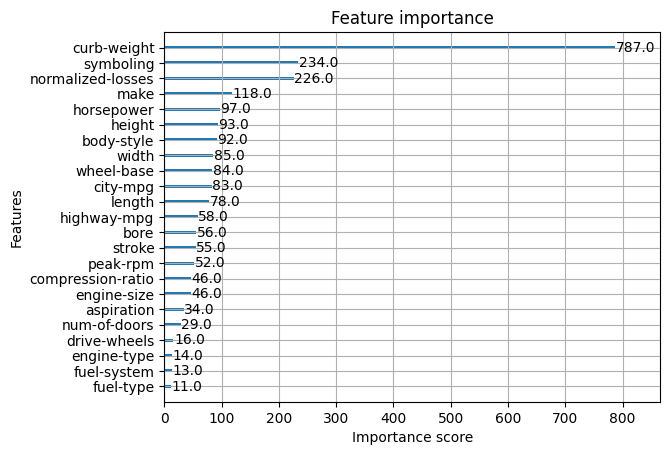

In [13]:
import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBRegressor()

x= ds.drop('price', axis = 1)
y = ds.price

model.fit(x, y)

#Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [14]:
sel_cols = ['curb-weight', 'symboling', 'normalized-losses', 'make', 'horsepower',
            'height', 'body-style', 'price']

new_data = ds[sel_cols]
new_data.head()

,curb-weight,symboling,normalized-losses,make,horsepower,height,body-style,price
0,2548,3,115.0,0,5,48.8,0,13495
1,2548,3,115.0,0,5,48.8,0,16500
2,2823,1,115.0,0,20,52.4,2,16500
3,2337,2,164.0,1,2,54.3,3,13950
4,2824,2,164.0,1,8,54.3,3,17450


In [15]:
ds.horsepower.dtype

dtype('int64')

In [17]:
#------ Modelling ---------
from sklearn.model_selection import train_test_split

x = new_data.drop('price', axis = 1)
y = new_data.price

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (181, 7)
Xtest: (21, 7)
Ytrain: (181,)
Ytest: (21,)


In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
xgb_model = xgb.XGBRegressor()



xgb_model.fit(x, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [19]:
from sklearn.metrics import r2_score

cv = xgb_model.predict(xtest)
print(r2_score(cv, ytest))

0.9990016222000122


In [20]:
#Model Saving
joblib.dump(xgb_model, open('autoMobilePredmodel.pkl','wb'))